In [1]:
import os, glob
import h5py
from pathlib import Path
import click
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import cPickle
import gopher
import tfomics
import acme
from acme import utils
from tqdm import tqdm

2022-07-08 11:27:52.289478: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/chandana/anaconda3/envs/scbasset/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [103]:
def get_dataset():
    filepath = "/home/rohit/projects/synthetic_runs/data/synthetic/synthetic_code_dataset.h5"
    with h5py.File(filepath, 'r') as dataset:
        x_test = np.array(dataset['X_test']).astype(np.float32)
        y_test = np.array(dataset['Y_test']).astype(np.int32)

    x_test = x_test.transpose([0,2,1])

    N, L, A = x_test.shape

    # get positive samples 
    pos_index = np.where(y_test[:,0])[0]
    X = x_test[pos_index]

    return X

def allkeys(obj):
    "Recursively find all keys in an h5py.Group."
    keys = (obj.name,)
    if isinstance(obj, h5py.Group):
        for key, value in obj.items():
            if isinstance(value, h5py.Group):
                keys = keys + allkeys(value)
            else:
                keys = keys + (value.name,)
    return keys

In [104]:
file_path = "/home/rohit/projects/synthetic_runs/results/synthetic_attrmaps.h5"
file = h5py.File(file_path, "r")
attr_map_paths = allkeys(file)

# load synthetic sequence
X = get_dataset()

# extract attr_map paths from h5 file
attr_maps = []
count = 0
for path in attr_map_paths:

    if isinstance(file[path], h5py.Dataset):
        attr_maps += [path]

In [105]:
attr_maps

['/fixedlr/bn/exponential/adversarial/deep-1/es/0/intgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/0/saliency',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/0/smoothgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/1/intgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/1/saliency',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/1/smoothgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/2/intgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/2/saliency',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/2/smoothgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/3/intgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/3/saliency',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/3/smoothgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/4/intgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/4/saliency',
 '/fixedlr/bn/exponential/adversarial/deep-1/es/4/smoothgrad',
 '/fixedlr/bn/exponential/adversarial/deep-1/final/0/intgrad',
 '/fixedlr/bn/exp

In [111]:
data = {
    "model": [],
    "kld": []
}

for i, attr_map_path in enumerate(attr_maps):
    print(i)
    attr_map = file[attr_map_path][:]
    
    # normalize attribution map & apply gradient correction
    attr_map = attr_map - np.mean(attr_map, axis=-1, keepdims=True)
    attr_map = attr_map / np.sqrt(np.sum(np.sum(np.square(attr_map), axis=-1, keepdims=True), axis=-2, keepdims=True))
    
    # calculate kld
    print("Calculating KLD!")
    kld = utils.calculate_kld(
                        sequences=X,
                        attr_maps=attr_map,
                        radius_count_cutoff=0.01
                        )
    data["model"] += [attr_map_path]
    data["kld"] += [kld]

0
Calculating KLD!
1
Calculating KLD!
2
Calculating KLD!
3
Calculating KLD!
4
Calculating KLD!
5
Calculating KLD!
6
Calculating KLD!
7
Calculating KLD!
8
Calculating KLD!
9
Calculating KLD!
10
Calculating KLD!
11
Calculating KLD!
12
Calculating KLD!
13
Calculating KLD!
14
Calculating KLD!
15
Calculating KLD!
16


/home/chandana/anaconda3/envs/scbasset/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == "":


Calculating KLD!
17
Calculating KLD!
18
Calculating KLD!
19
Calculating KLD!
20
Calculating KLD!
21
Calculating KLD!
22
Calculating KLD!
23
Calculating KLD!
24
Calculating KLD!
25
Calculating KLD!
26
Calculating KLD!
27
Calculating KLD!
28
Calculating KLD!
29
Calculating KLD!
30
Calculating KLD!
31
Calculating KLD!
32
Calculating KLD!
33
Calculating KLD!
34
Calculating KLD!
35
Calculating KLD!
36
Calculating KLD!
37
Calculating KLD!
38
Calculating KLD!
39
Calculating KLD!
40
Calculating KLD!
41
Calculating KLD!
42
Calculating KLD!
43
Calculating KLD!
44
Calculating KLD!
45
Calculating KLD!
46
Calculating KLD!
47
Calculating KLD!
48
Calculating KLD!
49
Calculating KLD!
50
Calculating KLD!
51
Calculating KLD!
52
Calculating KLD!
53
Calculating KLD!
54
Calculating KLD!
55
Calculating KLD!
56
Calculating KLD!
57
Calculating KLD!
58
Calculating KLD!
59
Calculating KLD!
60
Calculating KLD!
61
Calculating KLD!
62
Calculating KLD!
63
Calculating KLD!
64
Calculating KLD!
65
Calculating KLD!
66


412
Calculating KLD!
413
Calculating KLD!
414
Calculating KLD!
415
Calculating KLD!
416
Calculating KLD!
417
Calculating KLD!
418
Calculating KLD!
419
Calculating KLD!
420
Calculating KLD!
421
Calculating KLD!
422
Calculating KLD!
423
Calculating KLD!
424
Calculating KLD!
425
Calculating KLD!
426
Calculating KLD!
427
Calculating KLD!
428
Calculating KLD!
429
Calculating KLD!
430
Calculating KLD!
431
Calculating KLD!
432
Calculating KLD!
433
Calculating KLD!
434
Calculating KLD!
435
Calculating KLD!
436
Calculating KLD!
437
Calculating KLD!
438
Calculating KLD!
439
Calculating KLD!
440
Calculating KLD!
441
Calculating KLD!
442
Calculating KLD!
443
Calculating KLD!
444
Calculating KLD!
445
Calculating KLD!
446
Calculating KLD!
447
Calculating KLD!
448
Calculating KLD!
449
Calculating KLD!
450
Calculating KLD!
451
Calculating KLD!
452
Calculating KLD!
453
Calculating KLD!
454
Calculating KLD!
455
Calculating KLD!
456
Calculating KLD!
457
Calculating KLD!
458
Calculating KLD!
459
Calculati

Calculating KLD!
803
Calculating KLD!
804
Calculating KLD!
805
Calculating KLD!
806
Calculating KLD!
807
Calculating KLD!
808
Calculating KLD!
809
Calculating KLD!
810
Calculating KLD!
811
Calculating KLD!
812
Calculating KLD!
813
Calculating KLD!
814
Calculating KLD!
815
Calculating KLD!
816
Calculating KLD!
817
Calculating KLD!
818
Calculating KLD!
819
Calculating KLD!
820
Calculating KLD!
821
Calculating KLD!
822
Calculating KLD!
823
Calculating KLD!
824
Calculating KLD!
825
Calculating KLD!
826
Calculating KLD!
827
Calculating KLD!
828
Calculating KLD!
829
Calculating KLD!
830
Calculating KLD!
831
Calculating KLD!
832
Calculating KLD!
833
Calculating KLD!
834
Calculating KLD!
835
Calculating KLD!
836
Calculating KLD!
837
Calculating KLD!
838
Calculating KLD!
839
Calculating KLD!
840
Calculating KLD!
841
Calculating KLD!
842
Calculating KLD!
843
Calculating KLD!
844
Calculating KLD!
845
Calculating KLD!
846
Calculating KLD!
847
Calculating KLD!
848
Calculating KLD!
849
Calculating K

Calculating KLD!
1186
Calculating KLD!
1187
Calculating KLD!
1188
Calculating KLD!
1189
Calculating KLD!
1190
Calculating KLD!
1191
Calculating KLD!
1192
Calculating KLD!
1193
Calculating KLD!
1194
Calculating KLD!
1195
Calculating KLD!
1196
Calculating KLD!
1197
Calculating KLD!
1198
Calculating KLD!
1199
Calculating KLD!
1200
Calculating KLD!
1201
Calculating KLD!
1202
Calculating KLD!
1203
Calculating KLD!
1204
Calculating KLD!
1205
Calculating KLD!
1206
Calculating KLD!
1207
Calculating KLD!
1208
Calculating KLD!
1209
Calculating KLD!
1210
Calculating KLD!
1211
Calculating KLD!
1212
Calculating KLD!
1213
Calculating KLD!
1214
Calculating KLD!
1215
Calculating KLD!
1216
Calculating KLD!
1217
Calculating KLD!
1218
Calculating KLD!
1219
Calculating KLD!
1220
Calculating KLD!
1221
Calculating KLD!
1222
Calculating KLD!
1223
Calculating KLD!
1224
Calculating KLD!
1225
Calculating KLD!
1226
Calculating KLD!
1227
Calculating KLD!
1228
Calculating KLD!
1229
Calculating KLD!
1230
Calculatin

Calculating KLD!
1559
Calculating KLD!
1560
Calculating KLD!
1561
Calculating KLD!
1562
Calculating KLD!
1563
Calculating KLD!
1564
Calculating KLD!
1565
Calculating KLD!
1566
Calculating KLD!
1567
Calculating KLD!
1568
Calculating KLD!
1569
Calculating KLD!
1570
Calculating KLD!
1571
Calculating KLD!
1572
Calculating KLD!
1573
Calculating KLD!
1574
Calculating KLD!
1575
Calculating KLD!
1576
Calculating KLD!
1577
Calculating KLD!
1578
Calculating KLD!
1579
Calculating KLD!
1580
Calculating KLD!
1581
Calculating KLD!
1582
Calculating KLD!
1583
Calculating KLD!
1584
Calculating KLD!
1585
Calculating KLD!
1586
Calculating KLD!
1587
Calculating KLD!
1588
Calculating KLD!
1589
Calculating KLD!
1590
Calculating KLD!
1591
Calculating KLD!
1592
Calculating KLD!
1593
Calculating KLD!
1594
Calculating KLD!
1595
Calculating KLD!
1596
Calculating KLD!
1597
Calculating KLD!
1598
Calculating KLD!
1599
Calculating KLD!
1600
Calculating KLD!
1601
Calculating KLD!
1602
Calculating KLD!
1603
Calculatin

1932
Calculating KLD!
1933
Calculating KLD!
1934
Calculating KLD!
1935
Calculating KLD!
1936
Calculating KLD!
1937
Calculating KLD!
1938
Calculating KLD!
1939
Calculating KLD!
1940
Calculating KLD!
1941
Calculating KLD!
1942
Calculating KLD!
1943
Calculating KLD!
1944
Calculating KLD!
1945
Calculating KLD!
1946
Calculating KLD!
1947
Calculating KLD!
1948
Calculating KLD!
1949
Calculating KLD!
1950
Calculating KLD!
1951
Calculating KLD!
1952
Calculating KLD!
1953
Calculating KLD!
1954
Calculating KLD!
1955
Calculating KLD!
1956
Calculating KLD!
1957
Calculating KLD!
1958
Calculating KLD!
1959
Calculating KLD!
1960
Calculating KLD!
1961
Calculating KLD!
1962
Calculating KLD!
1963
Calculating KLD!
1964
Calculating KLD!
1965
Calculating KLD!
1966
Calculating KLD!
1967
Calculating KLD!
1968
Calculating KLD!
1969
Calculating KLD!
1970
Calculating KLD!
1971
Calculating KLD!
1972
Calculating KLD!
1973
Calculating KLD!
1974
Calculating KLD!
1975
Calculating KLD!
1976
Calculating KLD!
1977
Calcu

Calculating KLD!
2307
Calculating KLD!
2308
Calculating KLD!
2309
Calculating KLD!
2310
Calculating KLD!
2311
Calculating KLD!
2312
Calculating KLD!
2313
Calculating KLD!
2314
Calculating KLD!
2315
Calculating KLD!
2316
Calculating KLD!
2317
Calculating KLD!
2318
Calculating KLD!
2319
Calculating KLD!
2320
Calculating KLD!
2321
Calculating KLD!
2322
Calculating KLD!
2323
Calculating KLD!
2324
Calculating KLD!
2325
Calculating KLD!
2326
Calculating KLD!
2327
Calculating KLD!
2328
Calculating KLD!
2329
Calculating KLD!
2330
Calculating KLD!
2331
Calculating KLD!
2332
Calculating KLD!
2333
Calculating KLD!
2334
Calculating KLD!
2335
Calculating KLD!
2336
Calculating KLD!
2337
Calculating KLD!
2338
Calculating KLD!
2339
Calculating KLD!
2340
Calculating KLD!
2341
Calculating KLD!
2342
Calculating KLD!
2343
Calculating KLD!
2344
Calculating KLD!
2345
Calculating KLD!
2346
Calculating KLD!
2347
Calculating KLD!
2348
Calculating KLD!
2349
Calculating KLD!
2350
Calculating KLD!
2351
Calculatin

Calculating KLD!
2680
Calculating KLD!
2681
Calculating KLD!
2682
Calculating KLD!
2683
Calculating KLD!
2684
Calculating KLD!
2685
Calculating KLD!
2686
Calculating KLD!
2687
Calculating KLD!
2688
Calculating KLD!
2689
Calculating KLD!
2690
Calculating KLD!
2691
Calculating KLD!
2692
Calculating KLD!
2693
Calculating KLD!
2694
Calculating KLD!
2695
Calculating KLD!
2696
Calculating KLD!
2697
Calculating KLD!
2698
Calculating KLD!
2699
Calculating KLD!
2700
Calculating KLD!
2701
Calculating KLD!
2702
Calculating KLD!
2703
Calculating KLD!
2704
Calculating KLD!
2705
Calculating KLD!
2706
Calculating KLD!
2707
Calculating KLD!
2708
Calculating KLD!
2709
Calculating KLD!
2710
Calculating KLD!
2711
Calculating KLD!
2712
Calculating KLD!
2713
Calculating KLD!
2714
Calculating KLD!
2715
Calculating KLD!
2716
Calculating KLD!
2717
Calculating KLD!
2718
Calculating KLD!
2719
Calculating KLD!
2720
Calculating KLD!
2721
Calculating KLD!
2722
Calculating KLD!
2723
Calculating KLD!
2724
Calculatin

Calculating KLD!
3053
Calculating KLD!
3054
Calculating KLD!
3055
Calculating KLD!
3056
Calculating KLD!
3057
Calculating KLD!
3058
Calculating KLD!
3059
Calculating KLD!
3060
Calculating KLD!
3061
Calculating KLD!
3062
Calculating KLD!
3063
Calculating KLD!
3064
Calculating KLD!
3065
Calculating KLD!
3066
Calculating KLD!
3067
Calculating KLD!
3068
Calculating KLD!
3069
Calculating KLD!
3070
Calculating KLD!
3071
Calculating KLD!
3072
Calculating KLD!
3073
Calculating KLD!
3074
Calculating KLD!
3075
Calculating KLD!
3076
Calculating KLD!
3077
Calculating KLD!
3078
Calculating KLD!
3079
Calculating KLD!
3080
Calculating KLD!
3081
Calculating KLD!
3082
Calculating KLD!
3083
Calculating KLD!
3084
Calculating KLD!
3085
Calculating KLD!
3086
Calculating KLD!
3087
Calculating KLD!
3088
Calculating KLD!
3089
Calculating KLD!
3090
Calculating KLD!
3091
Calculating KLD!
3092
Calculating KLD!
3093
Calculating KLD!
3094
Calculating KLD!
3095
Calculating KLD!
3096
Calculating KLD!
3097
Calculatin

In [112]:
data

{'model': ['/fixedlr/bn/exponential/adversarial/deep-1/es/0/intgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/0/saliency',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/0/smoothgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/1/intgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/1/saliency',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/1/smoothgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/2/intgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/2/saliency',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/2/smoothgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/3/intgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/3/saliency',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/3/smoothgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/4/intgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/4/saliency',
  '/fixedlr/bn/exponential/adversarial/deep-1/es/4/smoothgrad',
  '/fixedlr/bn/exponential/adversarial/deep-1/final/0/in

<AxesSubplot:>

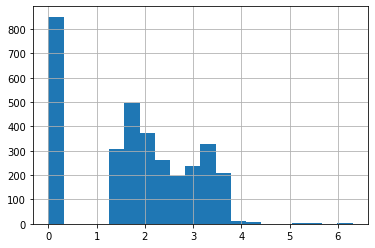

In [115]:
pd.DataFrame(data)["kld"].hist(bins=20)

In [117]:
pd.DataFrame(data).to_csv("/home/chandana/projects/acme/results/synthetic/entropy_results.csv", index=None)